# Sentiment Analysis of Reddit Comments on Israel and Palestine Conflict

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('pls_isl_conflict_comments.csv')


In [4]:
df.head()

comment_id  score                                          self_text  \
0    k5480sx      1  Exactly! I can remember the humanitarian aid s...   
1    k547q14      1  *We are the only part of the World that has Fr...   
2    k547elf      1  I don’t make Israeli strategy, nor am I Israel...   
3    k54742r      1  These people didn't vote Hamas in or something...   
4    k5473zi      1  We don't care what you do. We just want to liv...   

   subreddit      created_time  
0  worldnews  16-10-2023 19:39  
1  Palestine  16-10-2023 19:36  
2  worldnews  16-10-2023 19:34  
3  worldnews  16-10-2023 19:32  
4  worldnews  16-10-2023 19:32

In [5]:
df.tail()

comment_id  score                                          self_text  \
189626    k3sdwfc     42                               US. This is bullshit   
189627    k3sdixt      1  I am in the United States and it has the dotte...   
189628    k3sccp2     54  In which country are you?\nSometimes maps adap...   
189629    k3ritvj    116  You can't give up on something you only preten...   
189630    k3riboh     30  &gt; The head of Islamic Jihad denounced Arab ...   

        subreddit      created_time  
189626  Palestine  07-10-2023 05:20  
189627  Palestine  07-10-2023 05:17  
189628  Palestine  07-10-2023 05:08  
189629  worldnews  07-10-2023 01:46  
189630  worldnews  07-10-2023 01:42

In [6]:
df.shape

(189631, 5)

In [7]:
df.columns

Index(['comment_id', 'score', 'self_text', 'subreddit', 'created_time'], dtype='object')

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

comment_id      0
score           0
self_text       0
subreddit       0
created_time    0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189631 entries, 0 to 189630
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   comment_id    189631 non-null  object
 1   score         189631 non-null  int64 
 2   self_text     189631 non-null  object
 3   subreddit     189631 non-null  object
 4   created_time  189631 non-null  object
dtypes: int64(1), object(4)
memory usage: 7.2+ MB


In [11]:
df.describe()

score
count  189631.000000
mean       28.583607
std       179.946085
min      -934.000000
25%         1.000000
50%         2.000000
75%        10.000000
max     16463.000000

In [12]:
df.nunique()

comment_id      189631
score             1761
self_text       186338
subreddit           14
created_time     13562
dtype: int64

In [13]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object type columns:")
print(object_columns)

numerical_columns = df.select_dtypes(include=['int', 'float']).columns
print("\nNumerical type columns:")
print(numerical_columns)

Object type columns:
Index(['comment_id', 'self_text', 'subreddit', 'created_time'], dtype='object')

Numerical type columns:
Index(['score'], dtype='object')


In [14]:
df['subreddit'].unique()

array(['worldnews', 'Palestine', 'IsraelPalestine', 'TerrifyingAsFuck',
       'worldnewsvideo', 'AskMiddleEast', 'CombatFootage',
       'PublicFreakout', 'NonCredibleDefense', 'IsrealPalestineWar_23',
       'CrazyFuckingVideos', 'AbruptChaos', 'NoahGetTheBoat',
       'ActualPublicFreakouts'], dtype=object)

In [15]:
df['subreddit'].value_counts()

IsraelPalestine          52622
worldnews                36204
AskMiddleEast            28107
CombatFootage            27901
PublicFreakout           14255
NonCredibleDefense       13865
Palestine                 6968
worldnewsvideo            5598
IsrealPalestineWar_23     2537
TerrifyingAsFuck           546
NoahGetTheBoat             498
AbruptChaos                200
CrazyFuckingVideos         197
ActualPublicFreakouts      133
Name: subreddit, dtype: int64

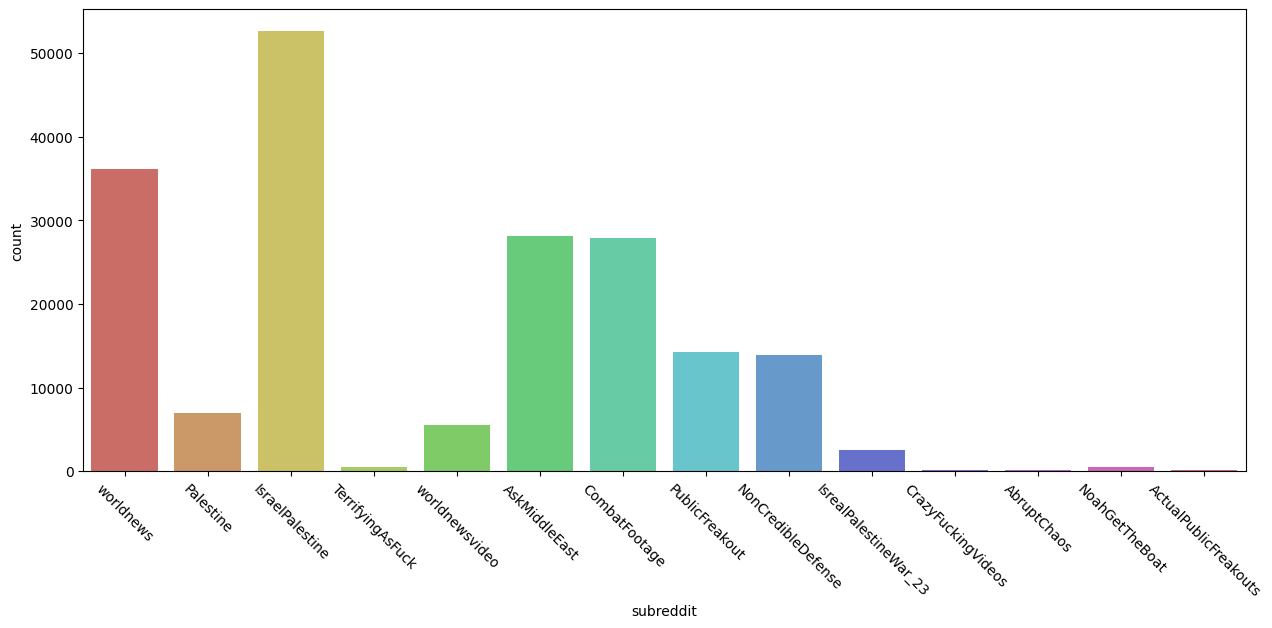

In [18]:
plt.figure(figsize=(15,6))
sns.countplot(x='subreddit', data=df, palette='hls')
plt.xticks(rotation = -45)
plt.show()

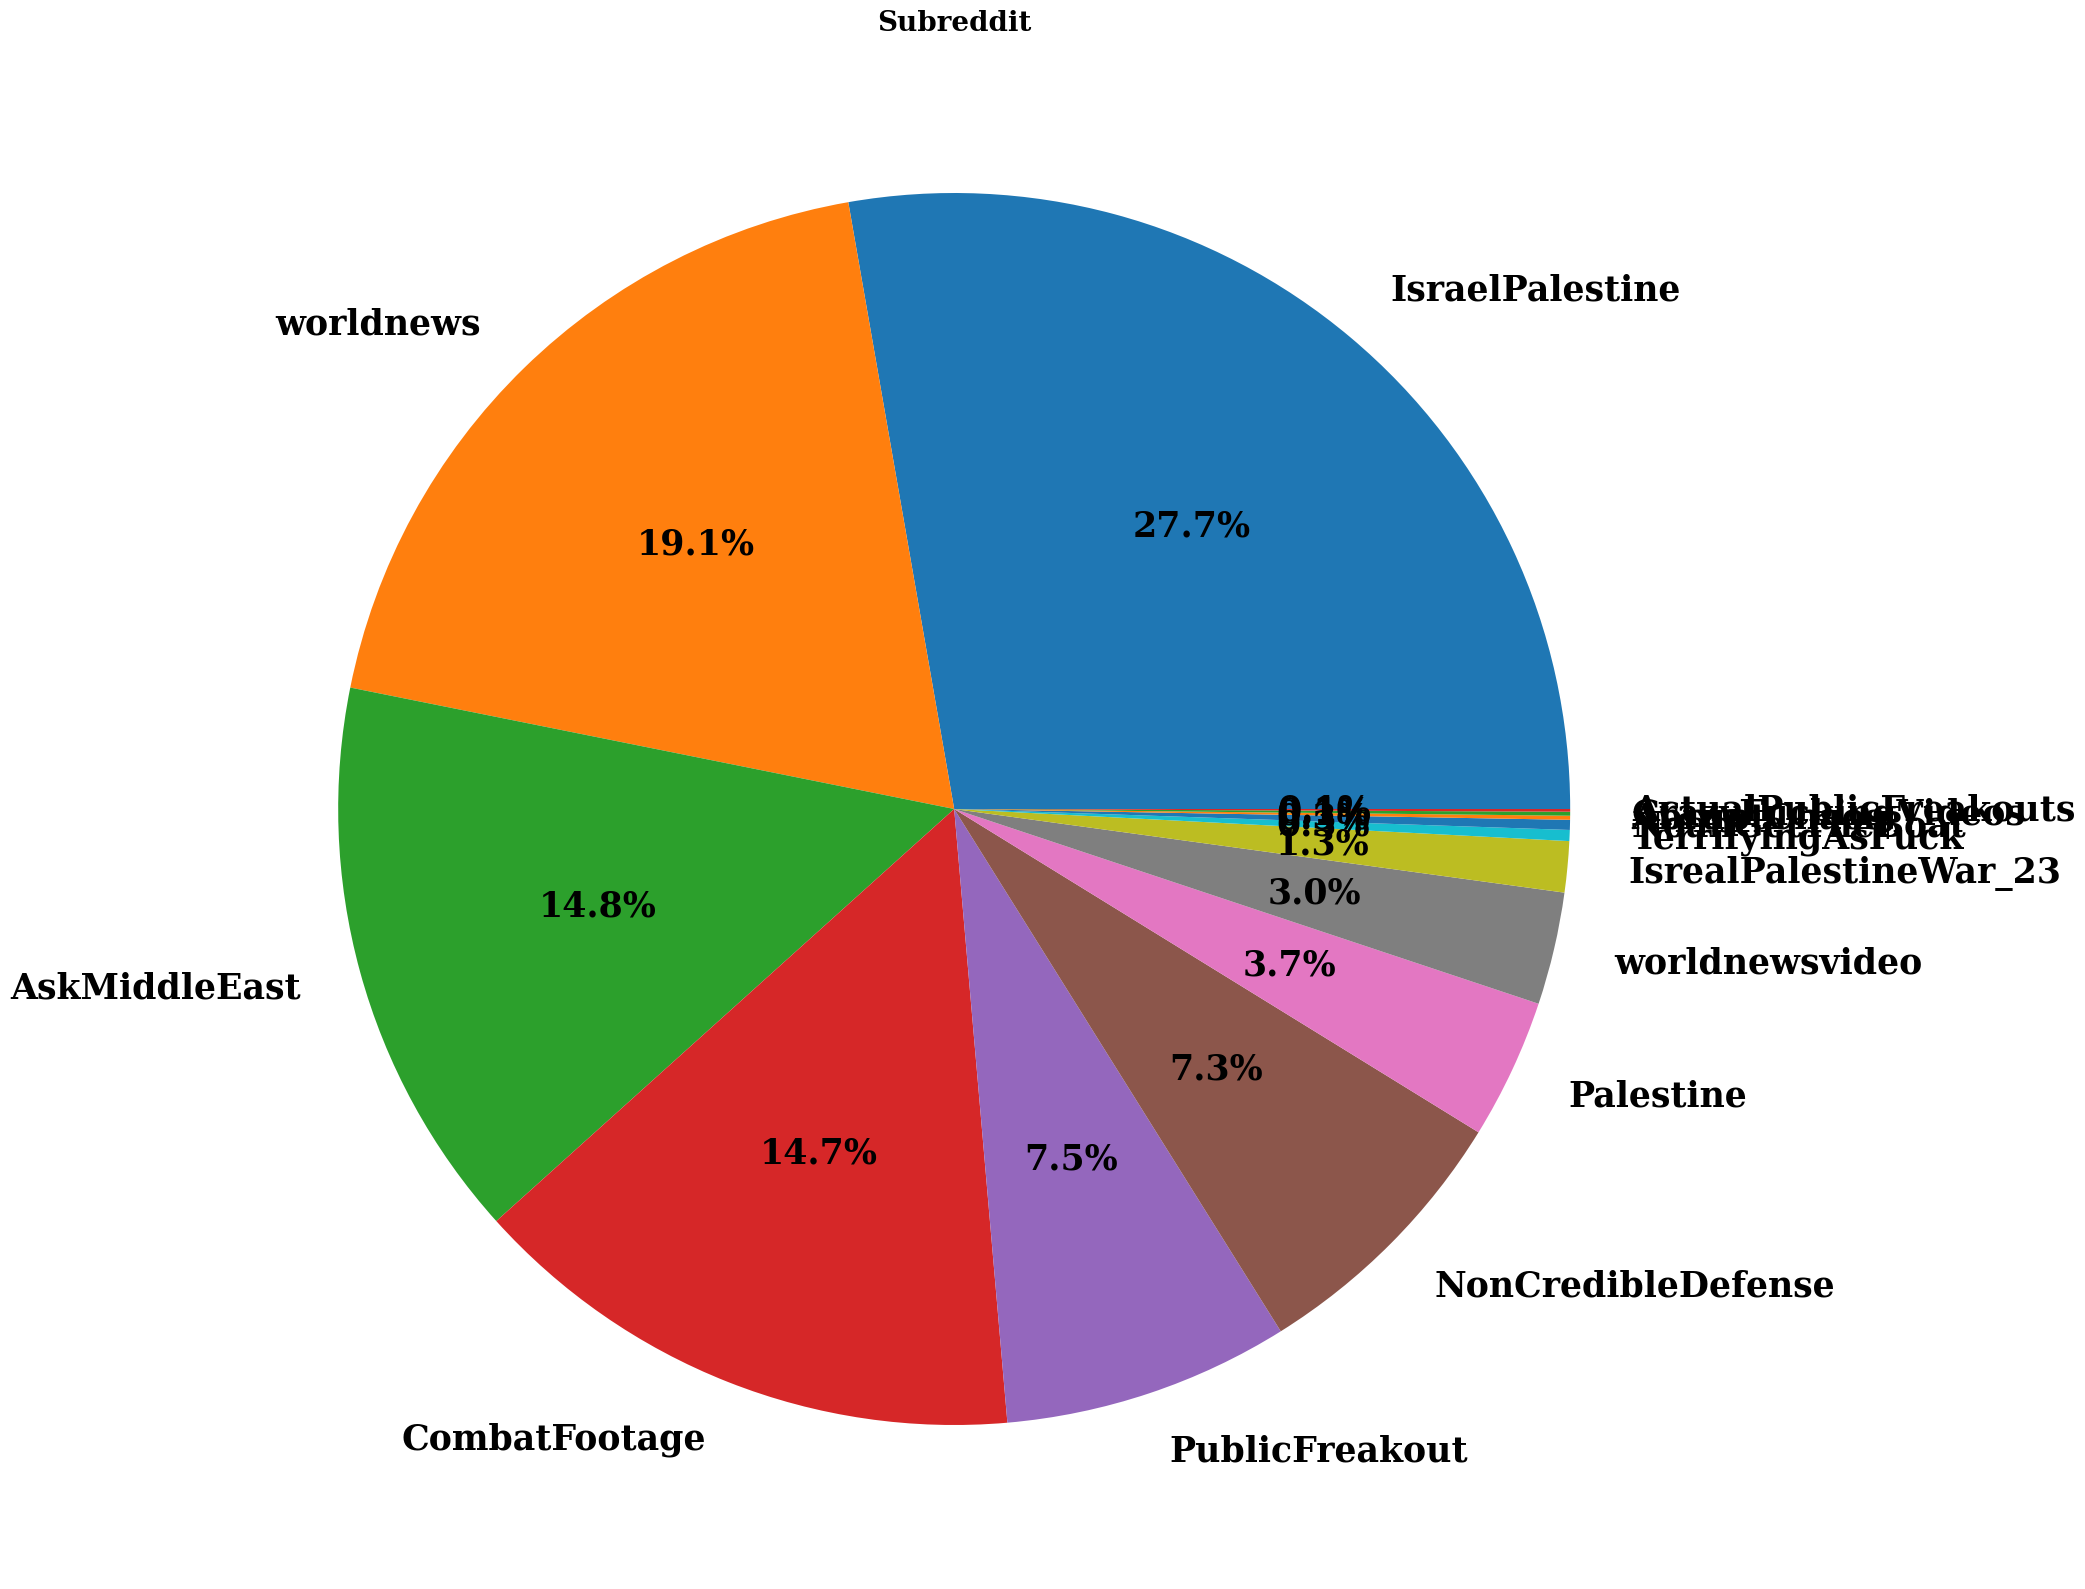

In [19]:
plt.figure(figsize=(30,20))
plt.pie(df['subreddit'].value_counts(), labels=df['subreddit'].value_counts().index,
        autopct='%1.1f%%', textprops={ 'fontsize': 25,
                                       'color': 'black',
                                        'weight': 'bold',
                                        'family': 'serif' })
hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Subreddit', size=20, **hfont)
plt.show()

In [22]:
fig = go.Figure(data=[go.Bar(x=df['subreddit'].value_counts().index,
                                 y=df['subreddit'].value_counts())])
fig.update_layout(title='Subreddit', xaxis_title='Subreddit', yaxis_title="Count")
fig.show()

In [23]:
fig = px.pie(df, names='subreddit', title = 'Subreddit')
fig.show()

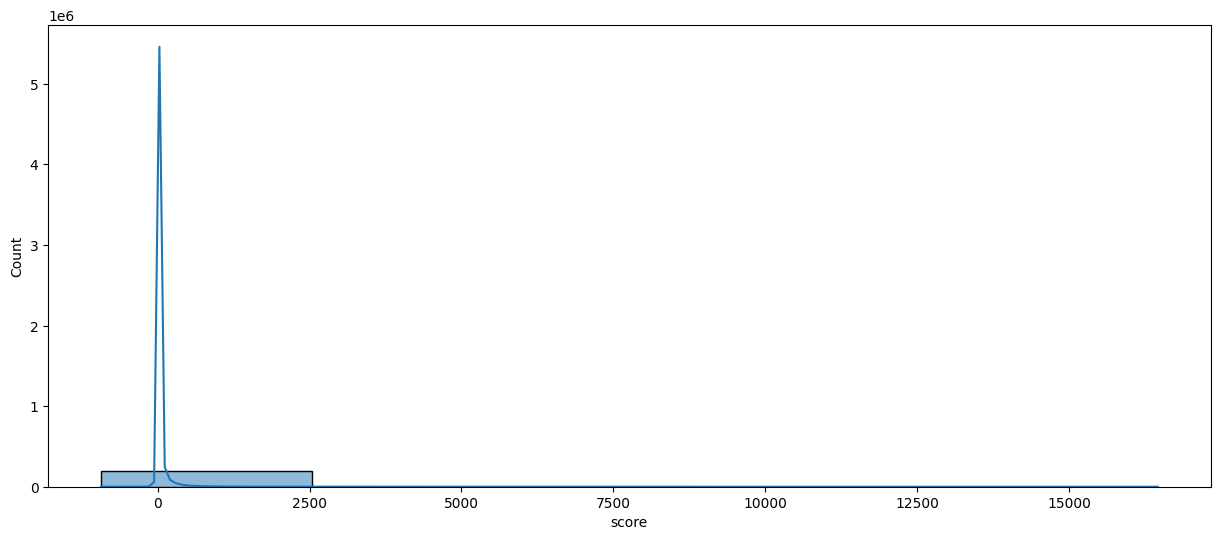

In [24]:
plt.figure(figsize=(15,6))
sns.histplot(df['score'], kde = True, bins = 5, palette = 'hls')
plt.show()

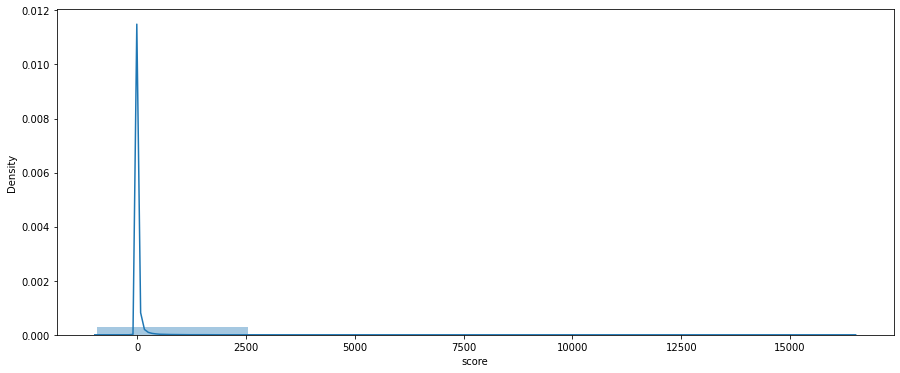

In [ ]:
plt.figure(figsize=(15,6))
sns.distplot(df['score'], kde = True, bins = 5)
plt.show()

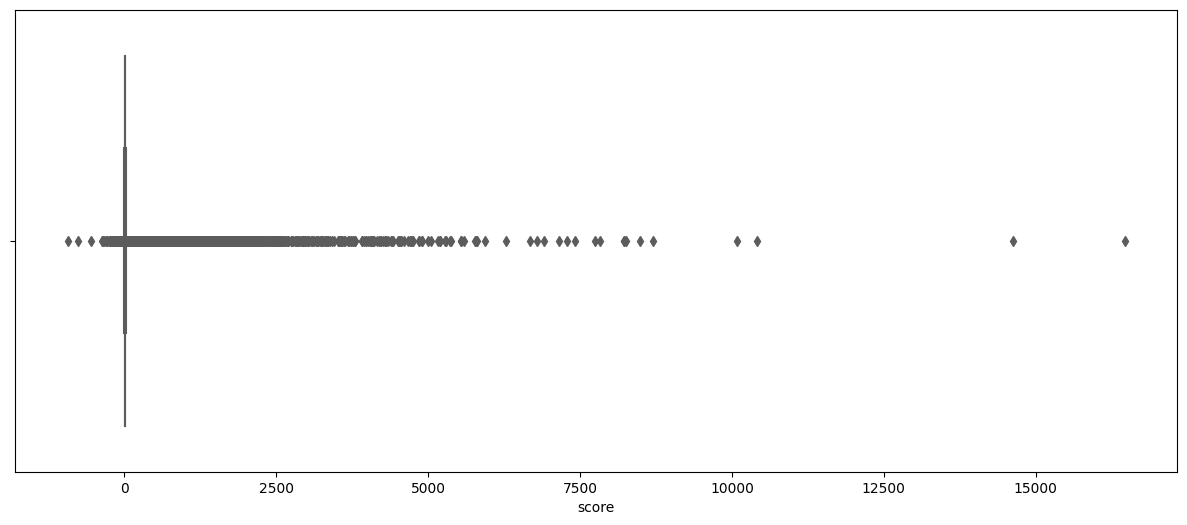

In [26]:
plt.figure(figsize=(15,6))
sns.boxplot(x='score', data = df, palette = 'hls')
plt.show()

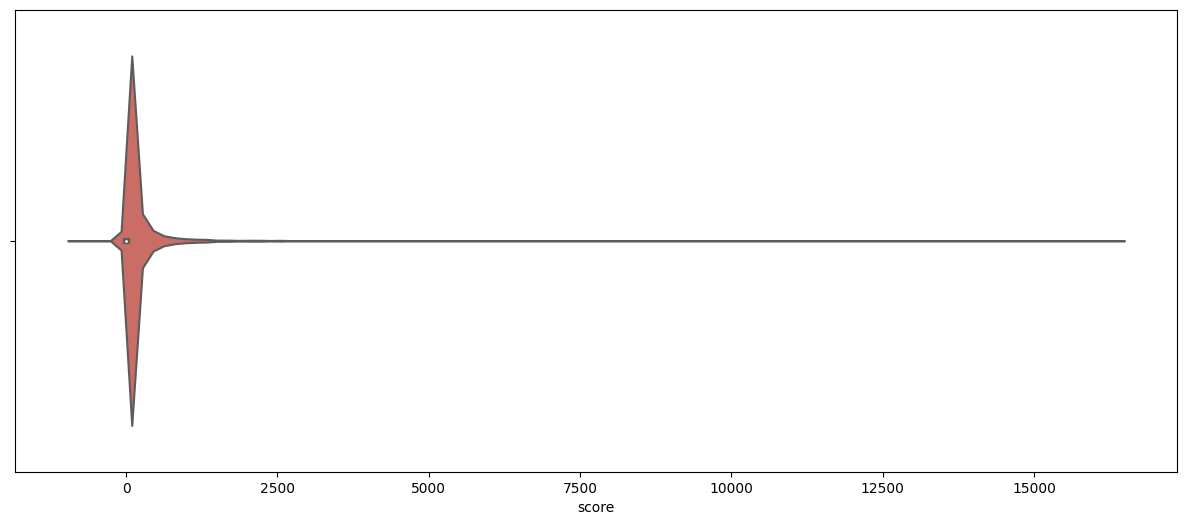

In [28]:
plt.figure(figsize=(15,6))
sns.violinplot(x='score', data = df, palette = 'hls')
plt.show()

In [29]:
fig = go.Figure(data=[go.Histogram(x=df['score'], nbinsx=5)])
fig.update_layout(title='Histogram of score', xaxis_title='score', yaxis_title='Count')
fig.show()

In [30]:
fig = px.box(df, y='score', title=f'Box Plot Score')
fig.show()

In [31]:
fig = px.violin(df, y='score', title=f'Box Plot Score')
fig.show()

In [32]:
df_new = df.copy()

In [33]:
def clean_text(text):
    text = text.lower()
    return text.strip()

In [34]:
df_new['self_text'] = df_new['self_text'].apply(lambda x: clean_text(x))

In [35]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [36]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

In [37]:
df_new['self_text']= df_new['self_text'].apply(lambda x:remove_punctuation(x))

In [38]:
import re

In [39]:
def tokenization(text):
    tokens = re.split('W+',text)
    return tokens

In [40]:
df_new['self_text']= df_new['self_text'].apply(lambda x: tokenization(x))

In [41]:
import nltk
from wordcloud import WordCloud

In [42]:
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [43]:
stopwords = nltk.corpus.stopwords.words('english')

In [44]:
def remove_stopwords(text):
    output= " ".join(i for i in text if i not in stopwords)
    return output

In [45]:
df_new['self_text']= df_new['self_text'].apply(lambda x:remove_stopwords(x))

In [46]:
from nltk.stem import WordNetLemmatizer

In [47]:
wordnet_lemmatizer = WordNetLemmatizer()

In [48]:
def lemmatizer(text):
    lemm_text = "".join([wordnet_lemmatizer.lemmatize(word) for word in text])
    return lemm_text

In [50]:
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [51]:
df_new['self_text']=df_new['self_text'].apply(lambda x:lemmatizer(x))

In [52]:
def clean_text(text):
    text = re.sub('\[.*\]','', text).strip()
    text = re.sub('\S*\d\S*\s*','', text).strip()
    return text.strip()

In [53]:
df_new['self_text'] = df_new['self_text'].apply(lambda x: clean_text(x))

In [54]:
def remove_urls(vTEXT):
    vTEXT = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', vTEXT, flags=re.MULTILINE)
    return(vTEXT)

In [55]:
df_new['self_text'] = df_new['self_text'].apply(lambda x: remove_urls(x))

In [56]:
def remove_digits(text):
    clean_text = re.sub(r"\b[0-9]+\b\s*", "", text)
    return(text)

In [57]:
df_new['self_text'] = df_new['self_text'].apply(lambda x: remove_digits(x))

In [58]:
def remove_emojis(data):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return re.sub(emoji_pattern, '', data)

In [59]:
df_new['self_text'] = df_new['self_text'].apply(lambda x: remove_emojis(x))

In [60]:
df_new['self_text'] = df_new['self_text'].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))

In [61]:
df_new['self_text'] = df_new['self_text'].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

In [62]:
df_new

comment_id  score                                          self_text  \
0         k5480sx      1  exactlycan remember the humanitarian aid strea...   
1         k547q14      1  we are the only part of the world that has fre...   
2         k547elf      1  i don’t make israeli strategy nor amisraeli or...   
3         k54742r      1  these people didnt vote hamas in or something ...   
4         k5473zi      1  we dont care what you do we just want to live ...   
...           ...    ...                                                ...   
189626    k3sdwfc     42                                us this is bullshit   
189627    k3sdixt      1  i am in the united states and it has the dotte...   
189628    k3sccp2     54  in which country are you sometimes maps adapt ...   
189629    k3ritvj    116  you cant give up on something you only pretend...   
189630    k3riboh     30  gt the head of islamic jihad denounced arab at...   

        subreddit      created_time  
0       worldnews  16-10-2023 19:39  
1       Palestine  16-10-2023 19:36  
2       worldnews  16-10-2023 19:34  
3       worldnews  16-10-2023 19:32  
4       worldnews  16-10-2023 19:32  
...           ...               ...  
189626  Palestine  07-10-2023 05:20  
189627  Palestine  07-10-2023 05:17  
189628  Palestine  07-10-2023 05:08  
189629  worldnews  07-10-2023 01:46  
189630  worldnews  07-10-2023 01:42  

[189631 rows x 5 columns]

In [63]:
from textblob import TextBlob

In [64]:
df_new['sentiment'] = df_new['self_text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

In [65]:
df_new

comment_id  score                                          self_text  \
0         k5480sx      1  exactlycan remember the humanitarian aid strea...   
1         k547q14      1  we are the only part of the world that has fre...   
2         k547elf      1  i don’t make israeli strategy nor amisraeli or...   
3         k54742r      1  these people didnt vote hamas in or something ...   
4         k5473zi      1  we dont care what you do we just want to live ...   
...           ...    ...                                                ...   
189626    k3sdwfc     42                                us this is bullshit   
189627    k3sdixt      1  i am in the united states and it has the dotte...   
189628    k3sccp2     54  in which country are you sometimes maps adapt ...   
189629    k3ritvj    116  you cant give up on something you only pretend...   
189630    k3riboh     30  gt the head of islamic jihad denounced arab at...   

        subreddit      created_time  sentiment  
0       worldnews  16-10-2023 19:39   0.000000  
1       Palestine  16-10-2023 19:36   0.000000  
2       worldnews  16-10-2023 19:34   0.305159  
3       worldnews  16-10-2023 19:32   0.045000  
4       worldnews  16-10-2023 19:32  -0.347643  
...           ...               ...        ...  
189626  Palestine  07-10-2023 05:20   0.000000  
189627  Palestine  07-10-2023 05:17   0.000000  
189628  Palestine  07-10-2023 05:08   0.000000  
189629  worldnews  07-10-2023 01:46  -0.300000  
189630  worldnews  07-10-2023 01:42  -0.032143  

[189631 rows x 6 columns]

In [66]:
sentiment_correlation = df_new[['score', 'sentiment']].corr()
print('Correlation between "score" and sentiment:')
print(sentiment_correlation)

Correlation between "score" and sentiment:
             score  sentiment
score      1.00000   -0.00933
sentiment -0.00933    1.00000


In [67]:
average_score_per_subreddit = df_new.groupby('subreddit')['score'].mean()
print('Average score per subreddit:')
print(average_score_per_subreddit)

Average score per subreddit:
subreddit
AbruptChaos               8.715000
ActualPublicFreakouts    60.563910
AskMiddleEast             4.736400
CombatFootage            40.808430
CrazyFuckingVideos       11.223350
IsraelPalestine           1.436205
IsrealPalestineWar_23     1.746945
NoahGetTheBoat           12.160643
NonCredibleDefense       33.659719
Palestine                11.412600
PublicFreakout           47.413750
TerrifyingAsFuck         36.661172
worldnews                76.210336
worldnewsvideo            8.808324
Name: score, dtype: float64


In [68]:
df_new['created_time'] = pd.to_datetime(df_new['created_time'])

In [69]:
score_over_time = df_new.set_index('created_time').resample('D')['score'].mean()
print('Score trends over time:')
print(score_over_time)

Score trends over time:
created_time
2023-07-10    120.231962
2023-07-11           NaN
2023-07-12           NaN
2023-07-13           NaN
2023-07-14           NaN
                 ...    
2023-12-06           NaN
2023-12-07           NaN
2023-12-08           NaN
2023-12-09           NaN
2023-12-10     28.593894
Freq: D, Name: score, Length: 154, dtype: float64


In [70]:
df_new['text_length'] = df_new['self_text'].apply(len)

In [71]:
length_correlation = df_new[['score', 'text_length']].corr()
print('Correlation between "score" and text length:')
print(length_correlation)

Correlation between "score" and text length:
               score  text_length
score        1.00000     -0.01091
text_length -0.01091      1.00000


In [72]:
from collections import Counter

In [73]:
def word_frequency(word):
    return df_new[df_new['self_text'].str.contains(word, case=False, na=False)]['score'].mean()

word_example_frequency = word_frequency('example')
print('Average score for comments containing the word "example":', word_example_frequency)

Average score for comments containing the word "example": 14.987375415282392


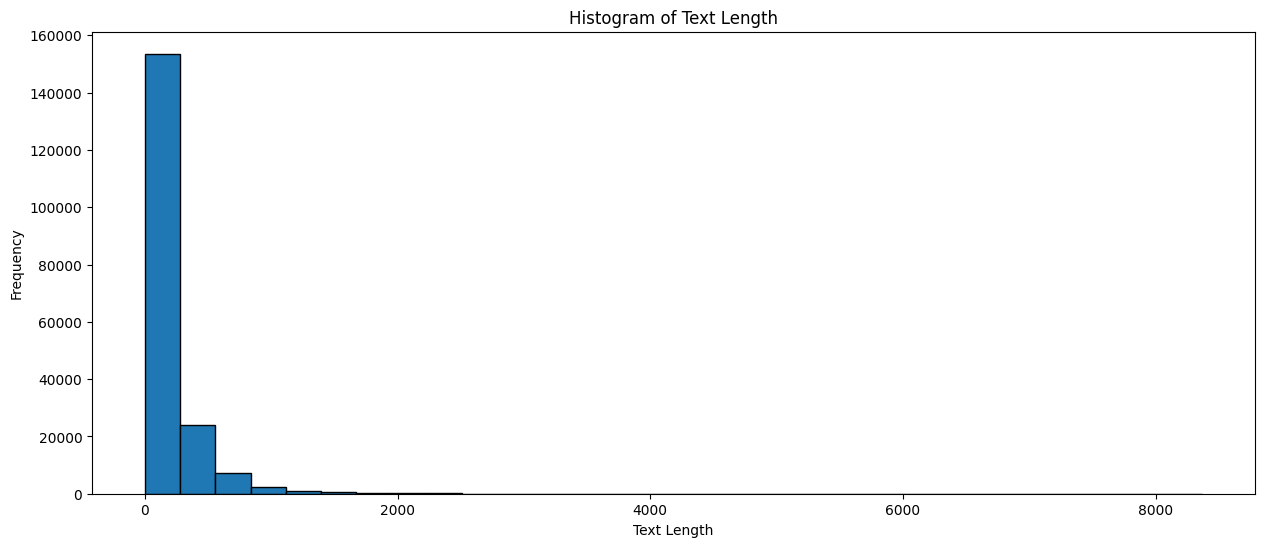

In [74]:
plt.figure(figsize=(15,6))
plt.hist(df_new['text_length'], bins=30, edgecolor='black')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Histogram of Text Length')
plt.show()

In [75]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [76]:
text_data = df_new['self_text'].astype(str)

In [77]:
vectorizer = CountVectorizer(max_df=0.85, stop_words='english')
text_vectorized = vectorizer.fit_transform(text_data)

In [78]:
num_topics = 5
lda = LDA(n_components=num_topics, random_state=42)
lda.fit(text_vectorized)

LatentDirichletAllocation(n_components=5, random_state=42)

In [81]:
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx + 1}:")
    feature_names = vectorizer.get_feature_names_out()
    print([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]])
    print()

Topic 1:
['iran', 'just', 'russia', 'israel', 'ukraine', 'like', 'dont', 'going', 'weapons', 'time']

Topic 2:
['hamas', 'israel', 'people', 'gaza', 'civilians', 'palestinians', 'just', 'israeli', 'like', 'war']

Topic 3:
['like', 'just', 'people', 'say', 'video', 'news', 'im', 'post', 'good', 'media']

Topic 4:
['comments', 'action', 'questions', 'comment', 'concerns', 'contact', 'based', 'automatically', 'performed', 'moderators']

Topic 5:
['israel', 'jews', 'land', 'palestine', 'people', 'palestinians', 'arab', 'like', 'jewish', 'state']



In [82]:
df_new

comment_id  score                                          self_text  \
0         k5480sx      1  exactlycan remember the humanitarian aid strea...   
1         k547q14      1  we are the only part of the world that has fre...   
2         k547elf      1  i don’t make israeli strategy nor amisraeli or...   
3         k54742r      1  these people didnt vote hamas in or something ...   
4         k5473zi      1  we dont care what you do we just want to live ...   
...           ...    ...                                                ...   
189626    k3sdwfc     42                                us this is bullshit   
189627    k3sdixt      1  i am in the united states and it has the dotte...   
189628    k3sccp2     54  in which country are you sometimes maps adapt ...   
189629    k3ritvj    116  you cant give up on something you only pretend...   
189630    k3riboh     30  gt the head of islamic jihad denounced arab at...   

        subreddit        created_time  sentiment  text_length  
0       worldnews 2023-10-16 19:39:00   0.000000          278  
1       Palestine 2023-10-16 19:36:00   0.000000          148  
2       worldnews 2023-10-16 19:34:00   0.305159          285  
3       worldnews 2023-10-16 19:32:00   0.045000          630  
4       worldnews 2023-10-16 19:32:00  -0.347643          293  
...           ...                 ...        ...          ...  
189626  Palestine 2023-07-10 05:20:00   0.000000           19  
189627  Palestine 2023-07-10 05:17:00   0.000000          120  
189628  Palestine 2023-07-10 05:08:00   0.000000          123  
189629  worldnews 2023-07-10 01:46:00  -0.300000           79  
189630  worldnews 2023-07-10 01:42:00  -0.032143         1232  

[189631 rows x 7 columns]

In [83]:
highest_score_index = df_new['score'].idxmax()

lowest_score_index = df_new['score'].idxmin()

highest_score_text = df_new.loc[highest_score_index, 'self_text']
highest_score = df_new.loc[highest_score_index, 'score']

lowest_score_text = df_new.loc[lowest_score_index, 'self_text']
lowest_score = df_new.loc[lowest_score_index, 'score']

print(f"Comment with the highest score ({highest_score}):")
print(highest_score_text)
print("\n")

print(f"Comment with the lowest score ({lowest_score}):")
print(lowest_score_text)

Comment with the highest score (16463):
that’s pretty damning for netanyahu and israeli intelligence no


Comment with the lowest score (-934):
too bad its pretty much pointless when they fire thousands of rockets


In [84]:
def categorize_sentiment(polarity):
    if polarity > 0.05:
        return 'Positive'
    elif polarity < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [85]:
df_new['sentiment_category'] = df_new['sentiment'].apply(categorize_sentiment)

In [86]:
df_new

comment_id  score                                          self_text  \
0         k5480sx      1  exactlycan remember the humanitarian aid strea...   
1         k547q14      1  we are the only part of the world that has fre...   
2         k547elf      1  i don’t make israeli strategy nor amisraeli or...   
3         k54742r      1  these people didnt vote hamas in or something ...   
4         k5473zi      1  we dont care what you do we just want to live ...   
...           ...    ...                                                ...   
189626    k3sdwfc     42                                us this is bullshit   
189627    k3sdixt      1  i am in the united states and it has the dotte...   
189628    k3sccp2     54  in which country are you sometimes maps adapt ...   
189629    k3ritvj    116  you cant give up on something you only pretend...   
189630    k3riboh     30  gt the head of islamic jihad denounced arab at...   

        subreddit        created_time  sentiment  text_length  \
0       worldnews 2023-10-16 19:39:00   0.000000          278   
1       Palestine 2023-10-16 19:36:00   0.000000          148   
2       worldnews 2023-10-16 19:34:00   0.305159          285   
3       worldnews 2023-10-16 19:32:00   0.045000          630   
4       worldnews 2023-10-16 19:32:00  -0.347643          293   
...           ...                 ...        ...          ...   
189626  Palestine 2023-07-10 05:20:00   0.000000           19   
189627  Palestine 2023-07-10 05:17:00   0.000000          120   
189628  Palestine 2023-07-10 05:08:00   0.000000          123   
189629  worldnews 2023-07-10 01:46:00  -0.300000           79   
189630  worldnews 2023-07-10 01:42:00  -0.032143         1232   

       sentiment_category  
0                 Neutral  
1                 Neutral  
2                Positive  
3                 Neutral  
4                Negative  
...                   ...  
189626            Neutral  
189627            Neutral  
189628            Neutral  
189629           Negative  
189630            Neutral  

[189631 rows x 8 columns]

In [87]:
df_new['sentiment_category'].unique()

array(['Neutral', 'Positive', 'Negative'], dtype=object)

In [88]:
df_new['sentiment_category'].value_counts()

Neutral     79689
Positive    68529
Negative    41413
Name: sentiment_category, dtype: int64

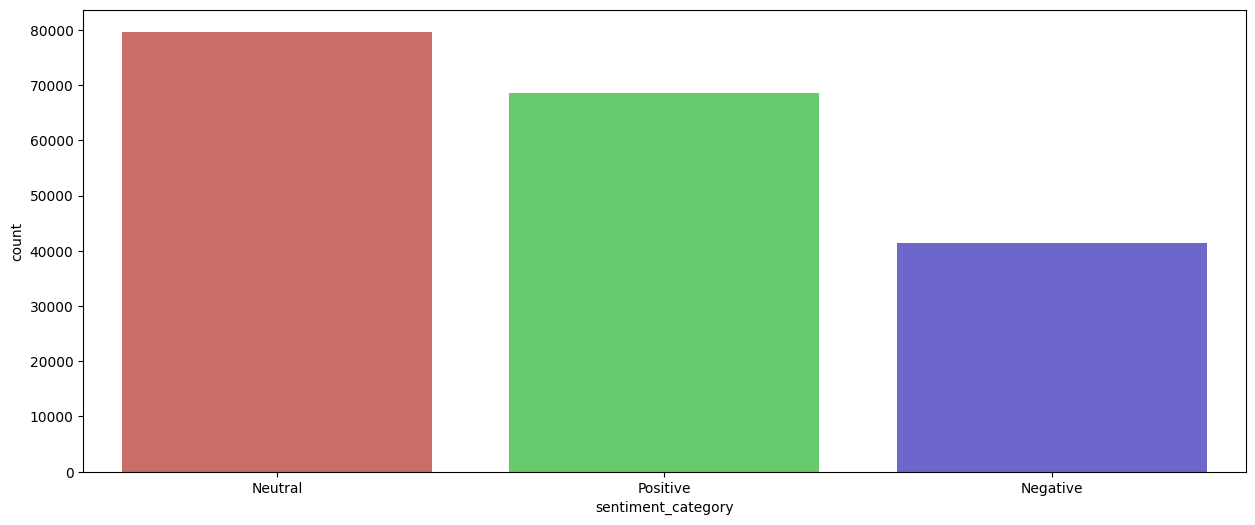

In [90]:
plt.figure(figsize=(15,6))
sns.countplot(x='sentiment_category', data = df_new, palette = 'hls')
plt.show()

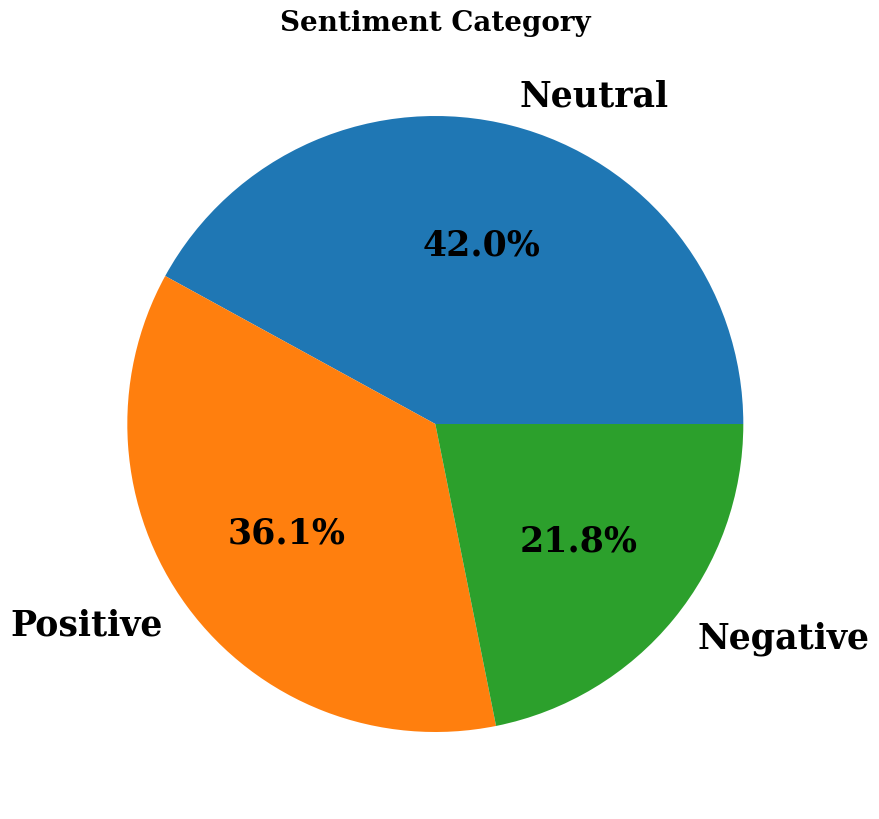

In [113]:
plt.figure(figsize=(20,10))
plt.pie(df_new['sentiment_category'].value_counts(), labels=df_new['sentiment_category'].value_counts().index,
        autopct='%1.1f%%', textprops={ 'fontsize': 25,
                                       'color': 'black',
                                        'weight': 'bold',
                                        'family': 'serif' })
hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Sentiment Category', size=20, **hfont)
plt.show()

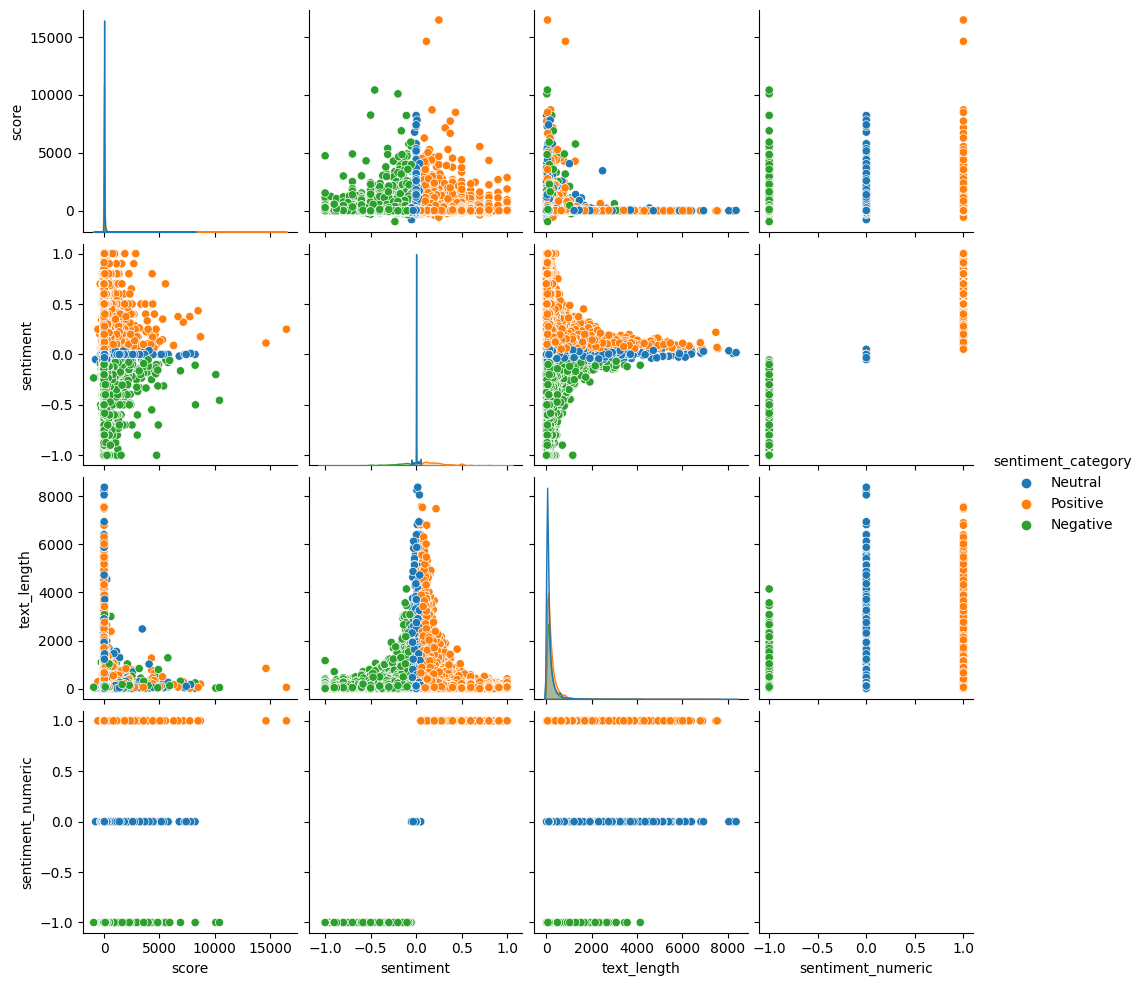

In [118]:
sns.pairplot(df_new, hue='sentiment_category')

<Figure size 1000x400 with 0 Axes>

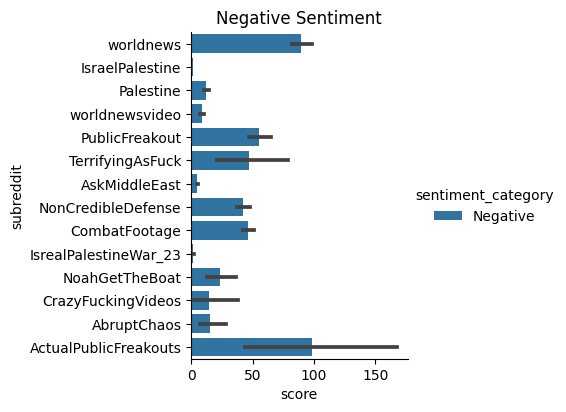

<Figure size 1000x400 with 0 Axes>

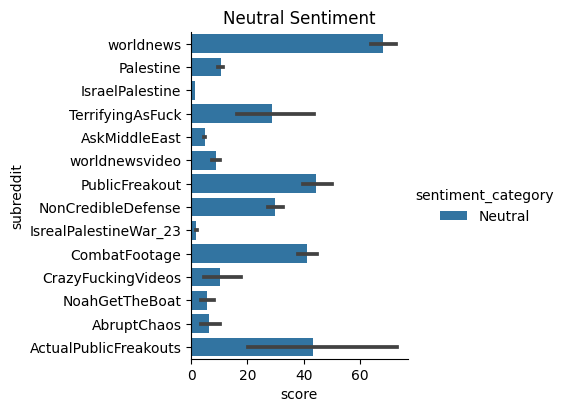

<Figure size 1000x400 with 0 Axes>

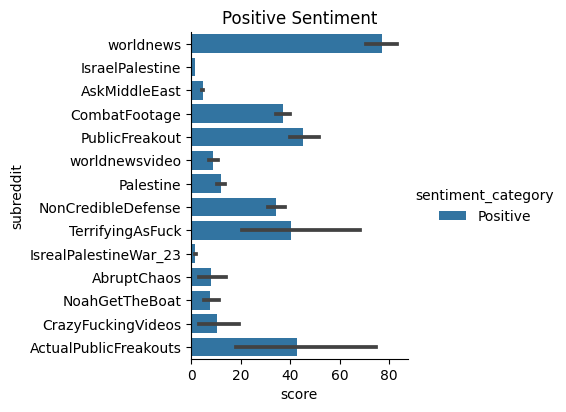

In [124]:
sentiments = ['Negative', 'Neutral', 'Positive']

# Create separate catplots for each sentiment using df_new
for sentiment in sentiments:
    plt.figure(figsize=(10, 4))  # Adjust the figure size as needed
    sns.catplot(data=df_new[df_new['sentiment_category'] == sentiment], y='subreddit', x='score', hue='sentiment_category', kind='bar', height=4, aspect=1.2)
    plt.title(f'{sentiment} Sentiment')
    plt.show()

<Figure size 1000x400 with 0 Axes>

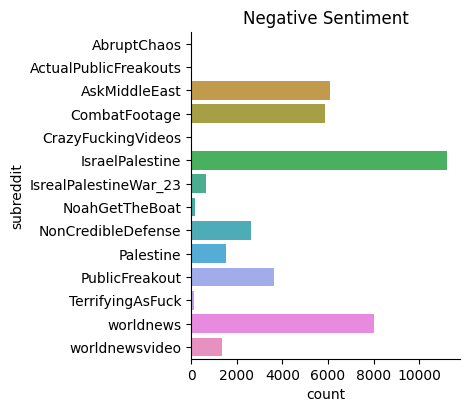

<Figure size 1000x400 with 0 Axes>

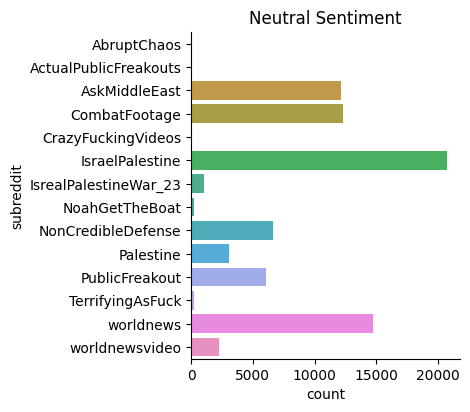

<Figure size 1000x400 with 0 Axes>

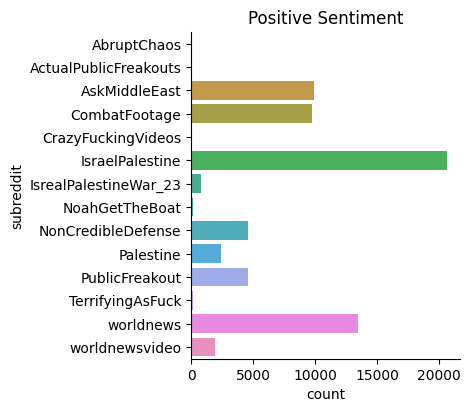

In [125]:
sentiment_counts = df_new.groupby(['subreddit', 'sentiment_category']).size().reset_index(name='count')


# Create separate catplots for each sentiment category using the calculated counts
for sentiment in sentiments:
    plt.figure(figsize=(10, 4))  # Adjust the figure size as needed
    sns.catplot(data=sentiment_counts[sentiment_counts['sentiment_category'] == sentiment], y='subreddit', x='count', kind='bar', height=4, aspect=1.2)
    plt.title(f'{sentiment} Sentiment')
    plt.show()

In [92]:
def map_sentiment_to_numeric(sentiment_category):
    if sentiment_category == 'Positive':
        return 1
    elif sentiment_category == 'Negative':
        return -1
    else:
        return 0

In [93]:
df_new['sentiment_numeric'] = df_new['sentiment_category'].apply(map_sentiment_to_numeric)

In [94]:
df3 = df_new[['self_text', 'sentiment_numeric']]

In [95]:
df3

self_text  sentiment_numeric
0       exactlycan remember the humanitarian aid strea...                  0
1       we are the only part of the world that has fre...                  0
2       i don’t make israeli strategy nor amisraeli or...                  1
3       these people didnt vote hamas in or something ...                  0
4       we dont care what you do we just want to live ...                 -1
...                                                   ...                ...
189626                                us this is bullshit                  0
189627  i am in the united states and it has the dotte...                  0
189628  in which country are you sometimes maps adapt ...                  0
189629  you cant give up on something you only pretend...                 -1
189630  gt the head of islamic jihad denounced arab at...                  0

[189631 rows x 2 columns]

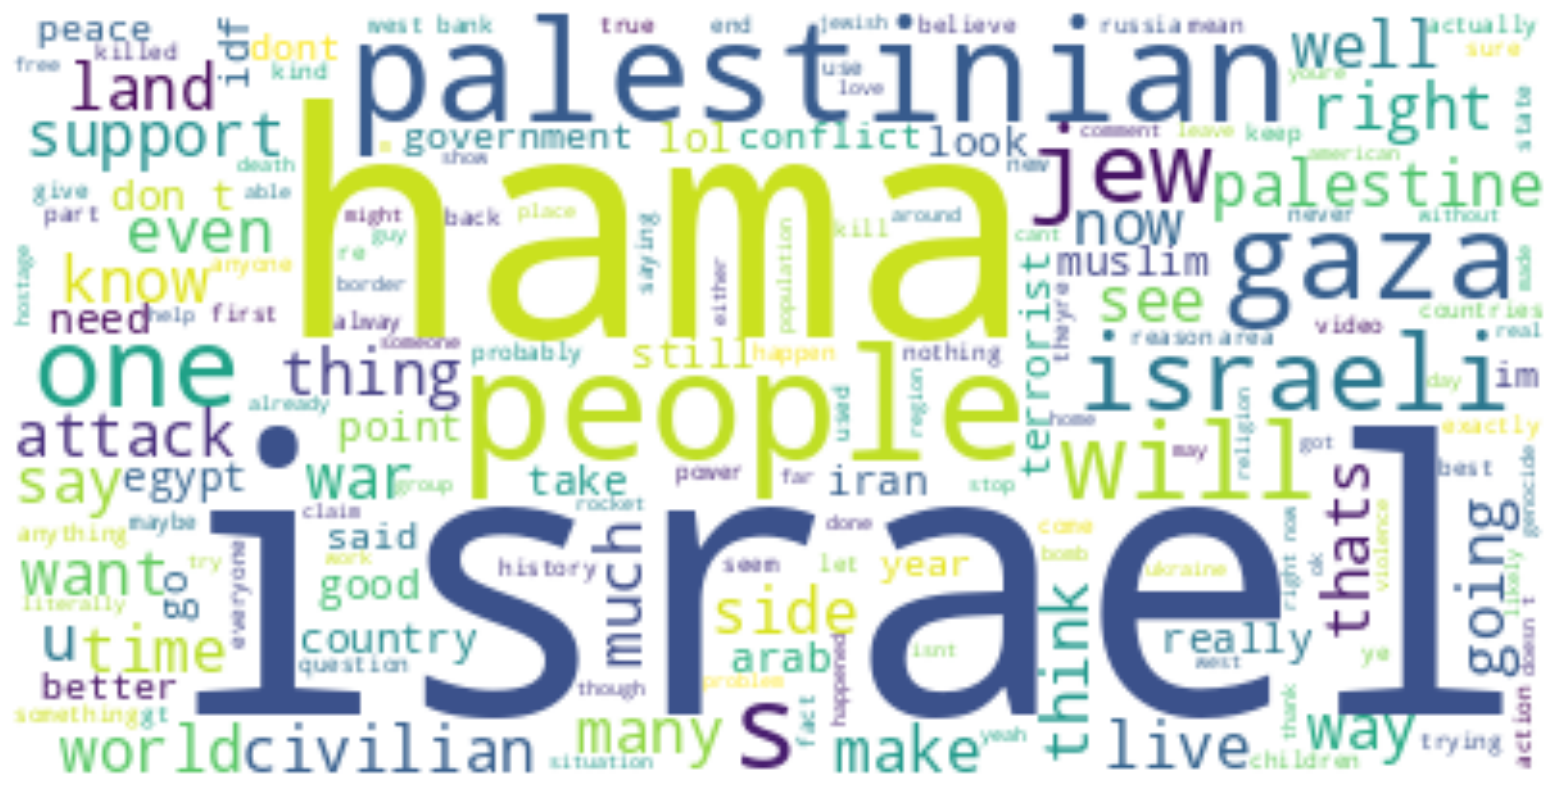

In [96]:
positive_text_data = ' '.join(df_new[df3['sentiment_numeric'] == 1]['self_text'])

if positive_text_data:
    wordcloud = WordCloud(background_color='white').generate(positive_text_data)

    fig, ax = plt.subplots(figsize=(30, 10))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    plt.show()
else:
    print('No positive text data to generate a word cloud.')

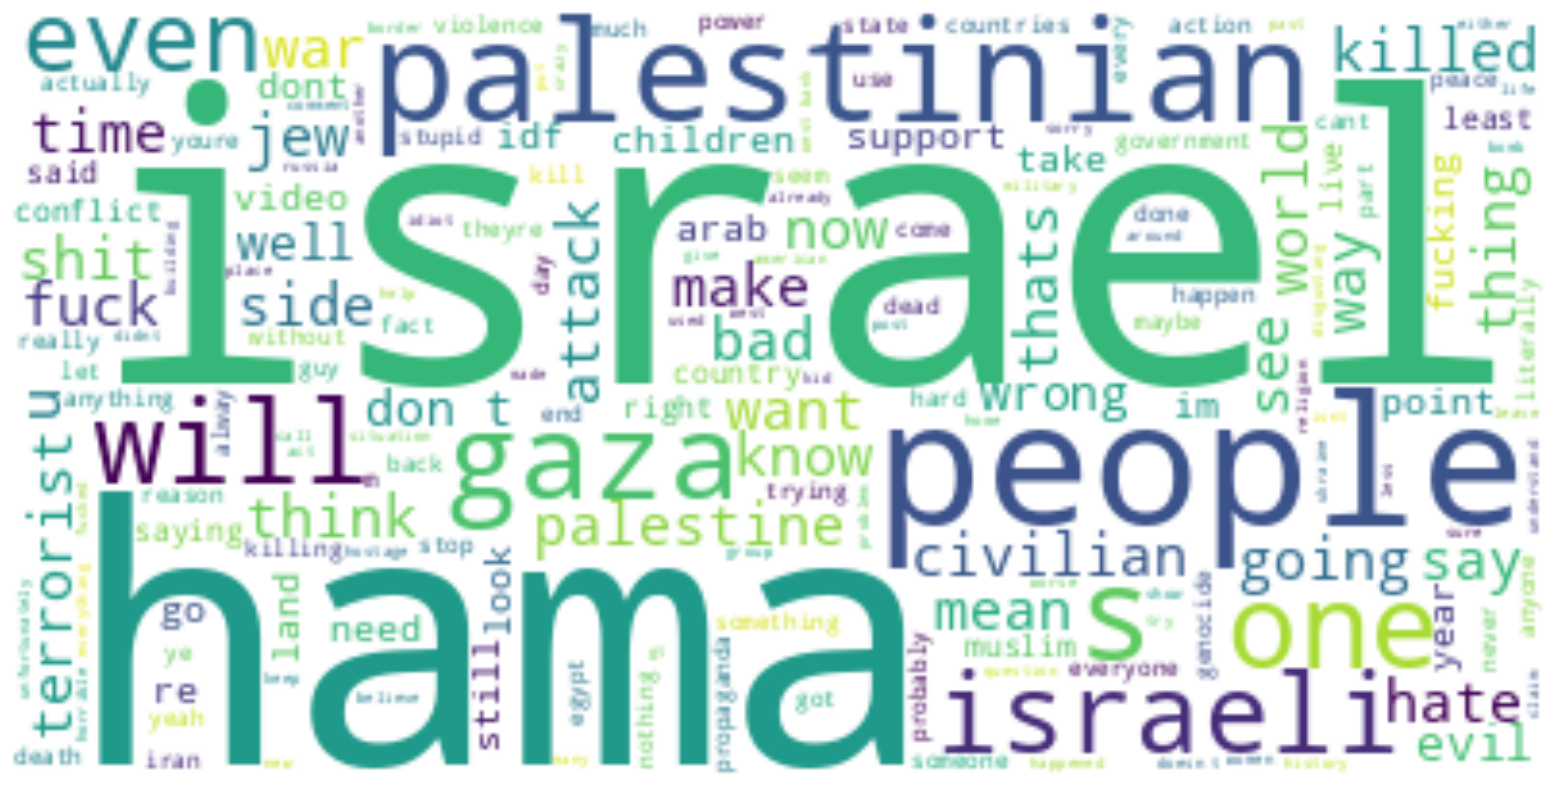

In [97]:
negative_text_data = ' '.join(df_new[df3['sentiment_numeric'] == -1]['self_text'])

if negative_text_data:
    wordcloud = WordCloud(background_color='white').generate(negative_text_data)

    fig, ax = plt.subplots(figsize=(30, 10))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    plt.show()
else:
    print('No negative text data to generate a word cloud.')

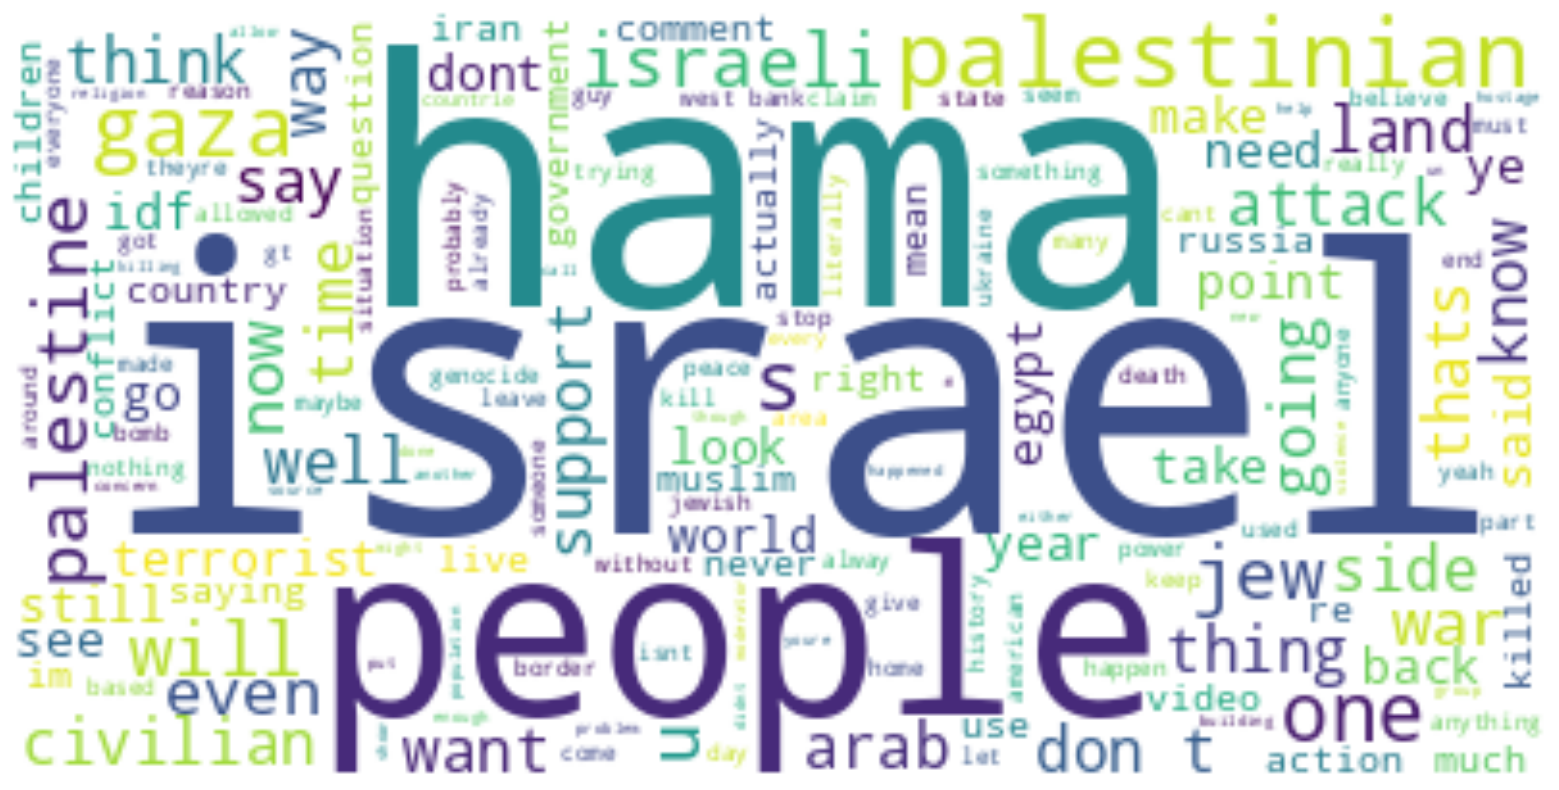

In [98]:
neutral_text_data = ' '.join(df_new[df3['sentiment_numeric'] == 0]['self_text'])

if neutral_text_data:
    wordcloud = WordCloud(background_color='white').generate(neutral_text_data)

    fig, ax = plt.subplots(figsize=(30, 10))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    plt.show()
else:
    print('No neutral text data to generate a word cloud.')

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.feature_extraction.text import TfidfVectorizer

In [100]:
X = df_new['self_text']
y = df_new['sentiment_numeric']

In [101]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(X)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [103]:
from sklearn.linear_model import LogisticRegression

In [104]:
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)

LogisticRegression()

In [105]:
y_pred = lr_classifier.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", lr_accuracy)

Accuracy: 0.8297255253513328


In [106]:
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Precision: 0.8311469792237322
Recall: 0.8297255253513328
F1 Score: 0.8291814267939249


In [107]:
from sklearn.tree import DecisionTreeClassifier

In [108]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [109]:
y_pred = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", dt_accuracy)

Accuracy: 0.7513380968703035


In [110]:
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Precision: 0.750523642478384
Recall: 0.7513380968703035
F1 Score: 0.750846181976367


In [111]:
accuracies = {
    'Logistic Regression': lr_accuracy,
    'Decision Tree': dt_accuracy,
}

In [112]:
fig = go.Figure(
    data=[
        go.Bar(x=list(accuracies.keys()), y=list(accuracies.values()))
    ],
    layout={
        'title': 'Model Comparison: Accuracy',
        'xaxis': {'title': 'Models'},
        'yaxis': {'title': 'Accuracy'}
    }
)
fig.show()